In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from functools import reduce


In [79]:
participation = pd.read_csv('participation.csv')
brands = pd.read_csv('brand_metrics.csv')
user_logins = pd.read_csv('user_logins.csv')

In [80]:
p_split = participation['brand_id|campaign_id|campaign_start_date'].str.split('|', expand = True)

In [81]:
p_split.columns = ['brand_id', 'campaign_id', 'campaign_start_date']

In [82]:
p_split['campaign_start_date'] = pd.to_datetime(p_split['campaign_start_date'])
p_split['campaign_start_date'] = p_split['campaign_start_date'].dt.tz_localize('UTC')
p_split['campaign_start_date'] = p_split['campaign_start_date'].dt.tz_convert('UTC')
p_split['ym_cdate'] = p_split['campaign_start_date'].apply(lambda x: x.strftime('%y-%m'))
p_split['brand_id'] = p_split['brand_id'].astype(str)


In [83]:
brands['joined_dojomojo'] = pd.to_datetime(brands['joined_dojomojo'])
brands['joined_dojomojo'] = brands['joined_dojomojo'].dt.tz_convert('UTC')
brands['ym_joined'] = brands['joined_dojomojo'].apply(lambda x: x.strftime('%y-%m'))
brands['brand_id'] = brands['brand_id'].astype(str)

In [84]:
cohorts = pd.merge(p_split, brands[['brand_id', 'joined_dojomojo','ym_joined']], on = 'brand_id')


In [85]:

cohorts['gap'] = cohorts.apply(lambda row: round( (row['campaign_start_date'] - row['joined_dojomojo']).days/30, 0), axis=1)

In [86]:

count = pd.DataFrame(cohorts.groupby('brand_id').count().ym_cdate)
count.columns = [ 'count']
count['count'] = 1
count.sample(10)

,count
brand_id,
5291,1
7091,1
2064,1
4432,1
4574,1
1815,1
5771,1
2490,1
2745,1


In [87]:
cohorts = pd.merge(cohorts, count, on = 'brand_id')


In [88]:
user_logins.dropna(inplace = True)
user_logins['brand_id'] = user_logins['brand_id'].apply(lambda x: int(x))
user_logins['brand_id'] = user_logins['brand_id'].astype(str)



df = pd.merge(cohorts, user_logins[['brand_id', 'created_at']], on = "brand_id")


In [89]:
#creating the cohort peirod
df['created_at'] = pd.to_datetime(df['created_at'])


In [90]:
df['cohort_period'] = df.apply(lambda row: round( (row['created_at'] - row['joined_dojomojo']).days/30, 0), axis=1)

In [104]:
df['cohort_period'] = df['cohort_period'].astype(object)
count_analysis = df[['ym_joined', 'cohort_period', 'count']].set_index(['ym_joined', 'cohort_period'])
count_analysis = count_analysis.groupby(['ym_joined', 'cohort_period'])['count'].sum().unstack()

In [112]:
count_analysis = count_analysis.divide(1000)
count_analysis.head(10)

cohort_period,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0
ym_joined,,,,,,,,,,,,,,,,,,,,,
17-02,0.349,0.594,0.515,0.342,0.668,0.792,0.583,0.400,0.464,0.338,...,0.353,0.701,0.345,0.324,0.383,0.279,0.162,0.091,0.079,0.300
17-03,1.970,2.444,2.461,1.749,2.736,2.551,2.384,3.130,3.121,3.126,...,2.415,2.412,1.587,0.962,1.379,1.529,1.890,1.392,1.591,0.091
17-04,1.472,3.035,3.710,3.531,3.625,2.550,2.831,2.187,2.398,3.191,...,1.858,1.762,1.345,1.989,1.869,1.724,1.559,0.919,0.020,NaN
17-05,1.458,2.870,3.825,3.016,2.990,2.660,2.675,2.893,2.439,2.230,...,2.196,1.421,1.265,1.947,2.333,3.183,1.726,0.279,NaN,NaN
17-06,1.963,4.436,4.425,3.054,3.245,3.364,3.793,3.326,4.054,3.181,...,2.684,2.506,2.674,3.529,2.961,3.545,0.462,NaN,NaN,NaN
17-07,2.636,4.099,3.519,3.715,3.990,2.867,3.102,3.848,4.373,4.092,...,4.686,5.052,3.801,2.285,1.006,0.024,NaN,NaN,NaN,NaN
17-08,2.843,4.151,3.833,3.573,3.089,3.898,3.457,2.691,4.174,4.351,...,4.058,3.992,3.581,2.945,0.170,NaN,NaN,NaN,NaN,NaN
17-09,4.382,8.196,7.906,5.329,6.039,5.336,5.913,6.136,5.786,4.888,...,3.814,3.377,1.935,0.042,NaN,NaN,NaN,NaN,NaN,NaN
17-10,4.572,6.833,6.127,7.089,6.003,5.928,7.463,7.081,6.359,5.435,...,3.471,2.886,0.039,NaN,NaN,NaN,NaN,NaN,NaN,NaN


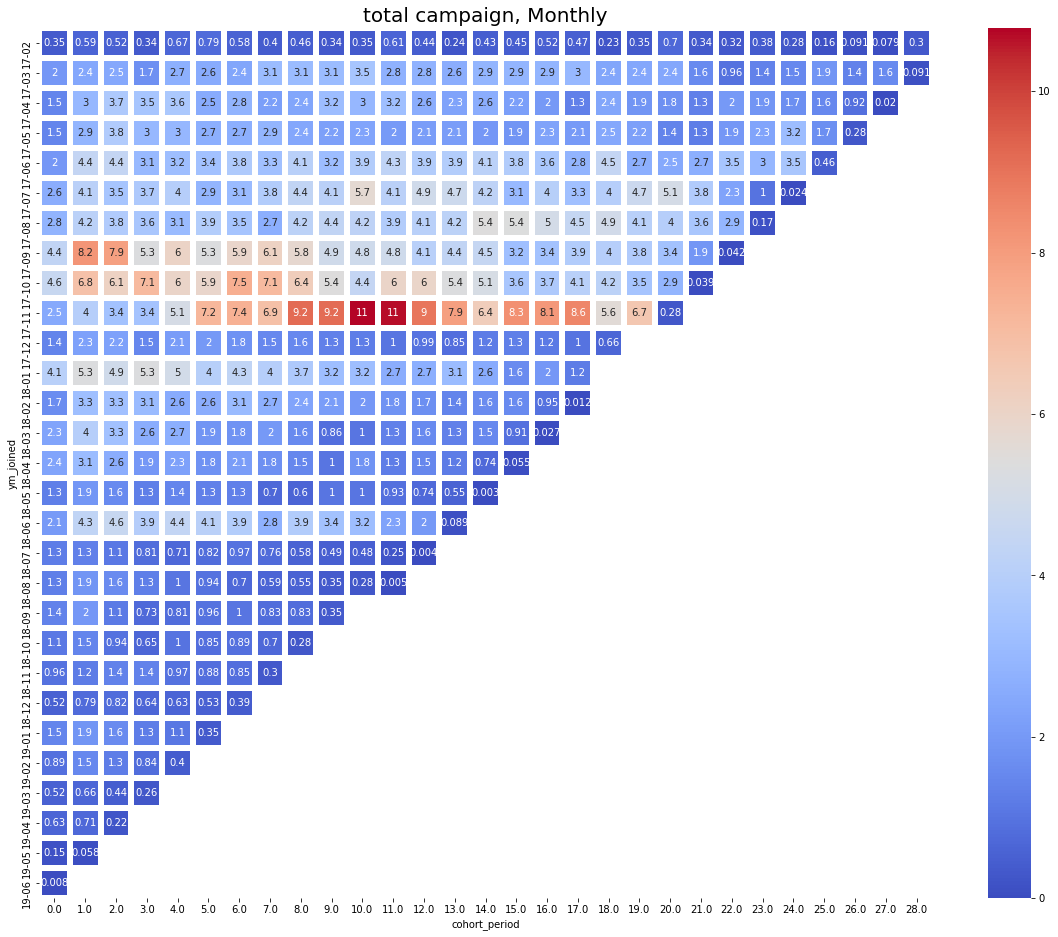

In [175]:
def heatmap(x:pd.DataFrame, title:str, unit:str):
    if title == None:
        title = 'total campaign, Monthly'
    if unit == None:
        unit = '.2g'
    plt.figure(figsize = (20, 16))
    ax = plt.axes()
    ax.set_title(title, fontsize = 20)
    
    sb.heatmap(x , annot = True, linewidths = 5, cmap = 'coolwarm', fmt = unit)

    plt.show()
heatmap(count_analysis, title = None, unit = None)

In [148]:
df.head()

,brand_id,campaign_id,campaign_start_date,ym_cdate,joined_dojomojo,ym_joined,gap,count,created_at,cohort_period
0,6825,5550,2019-06-11 00:00:00+00:00,19-06,2019-03-07 23:15:33+00:00,19-03,3.0,1,2019-03-07 23:15:34.992000+00:00,0
1,6825,5550,2019-06-11 00:00:00+00:00,19-06,2019-03-07 23:15:33+00:00,19-03,3.0,1,2019-03-08 00:16:39.993000+00:00,0
2,6825,5550,2019-06-11 00:00:00+00:00,19-06,2019-03-07 23:15:33+00:00,19-03,3.0,1,2019-03-08 16:07:35.200000+00:00,0
3,6825,5550,2019-06-11 00:00:00+00:00,19-06,2019-03-07 23:15:33+00:00,19-03,3.0,1,2019-03-11 16:16:53.449000+00:00,0
4,6825,5550,2019-06-11 00:00:00+00:00,19-06,2019-03-07 23:15:33+00:00,19-03,3.0,1,2019-03-11 19:18:32.154000+00:00,0


In [149]:
invites = pd.read_csv('invite.csv', error_bad_lines = False)
invites.head()

,brand_id,accountname,most_recent_login,joined_dojomojo,list_size,f2m_applications,f2m_invites,f15d_invites,f2m_accepted_applications,f2m_accepted_invites,f2m_messages_sent,f15d_messages_sent
0,2,Luxury Link,2019-06-20 15:36:21,2015-10-29 02:51:32,650000,0.0,1.0,1.0,0.0,1.0,0.0,0.0
1,3,wine awesomeness,2019-06-20 16:20:57,2015-10-29 02:51:32,1100000,0.0,19.0,16.0,0.0,19.0,0.0,0.0
2,4,Travel + Leisure,2019-06-20 16:21:58,2015-10-29 02:51:32,1000000,0.0,2.0,2.0,0.0,1.0,0.0,0.0
3,6,test brand,2017-05-18 19:24:39,2015-10-29 02:51:32,0,0.0,1.0,1.0,0.0,0.0,NaN,NaN
4,9,Man Repeller,2017-10-31 19:30:34,2015-10-29 02:51:32,65000,0.0,1.0,1.0,0.0,1.0,NaN,NaN


In [150]:
def divide(invites):
    if invites['f15d_messages_sent'] != 0:
        return invites['f15d_invites']/invites['f15d_messages_sent']
    else:
        return 0
invites['invi_div_messa_15d'] = invites.apply(lambda row: divide(row), axis = 1)
invites.head()

,brand_id,accountname,most_recent_login,joined_dojomojo,list_size,f2m_applications,f2m_invites,f15d_invites,f2m_accepted_applications,f2m_accepted_invites,f2m_messages_sent,f15d_messages_sent,invi_div_messa_15d
0,2,Luxury Link,2019-06-20 15:36:21,2015-10-29 02:51:32,650000,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
1,3,wine awesomeness,2019-06-20 16:20:57,2015-10-29 02:51:32,1100000,0.0,19.0,16.0,0.0,19.0,0.0,0.0,0.0
2,4,Travel + Leisure,2019-06-20 16:21:58,2015-10-29 02:51:32,1000000,0.0,2.0,2.0,0.0,1.0,0.0,0.0,0.0
3,6,test brand,2017-05-18 19:24:39,2015-10-29 02:51:32,0,0.0,1.0,1.0,0.0,0.0,NaN,NaN,NaN
4,9,Man Repeller,2017-10-31 19:30:34,2015-10-29 02:51:32,65000,0.0,1.0,1.0,0.0,1.0,NaN,NaN,NaN


In [151]:
invites.fillna(0)

,brand_id,accountname,most_recent_login,joined_dojomojo,list_size,f2m_applications,f2m_invites,f15d_invites,f2m_accepted_applications,f2m_accepted_invites,f2m_messages_sent,f15d_messages_sent,invi_div_messa_15d
0,2,Luxury Link,2019-06-20 15:36:21,2015-10-29 02:51:32,650000,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.000000
1,3,wine awesomeness,2019-06-20 16:20:57,2015-10-29 02:51:32,1100000,0.0,19.0,16.0,0.0,19.0,0.0,0.0,0.000000
2,4,Travel + Leisure,2019-06-20 16:21:58,2015-10-29 02:51:32,1000000,0.0,2.0,2.0,0.0,1.0,0.0,0.0,0.000000
3,6,test brand,2017-05-18 19:24:39,2015-10-29 02:51:32,0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.000000
4,9,Man Repeller,2017-10-31 19:30:34,2015-10-29 02:51:32,65000,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.000000
5,11,Freshly,2018-07-17 15:52:57,2015-10-29 02:51:32,800000,0.0,4.0,4.0,0.0,3.0,0.0,0.0,0.000000
6,12,OAK73,2017-02-16 20:06:22,2015-10-29 02:51:32,100000,0.0,3.0,2.0,0.0,3.0,0.0,0.0,0.000000
7,13,Stella Spoils,2018-08-13 15:24:26,2015-10-29 02:51:32,200000,0.0,4.0,4.0,0.0,4.0,0.0,0.0,0.000000
8,14,goop,2019-05-23 18:55:49,2015-10-29 02:51:32,1000000,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.000000
9,15,Uncubed,2019-06-16 18:46:27,2015-10-29 02:51:32,230000,0.0,3.0,2.0,0.0,3.0,0.0,0.0,0.000000


In [157]:
invites['brand_id']= invites['brand_id'].astype(str)
cohorts_f15_d = pd.merge(df, invites[['brand_id', 'invi_div_messa_15d']], on = 'brand_id')

In [160]:
df_f15d = cohorts_f15_d.groupby(['ym_joined', 'cohort_period']).invi_div_messa_15d.mean().unstack()

In [161]:
df_f15d.head()

cohort_period,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0
ym_joined,,,,,,,,,,,,,,,,,,,,,
17-02,0.092484,0.122147,0.071672,0.098031,0.056031,0.056709,0.063710,0.065000,0.072044,0.087912,...,0.010522,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
17-03,0.255936,0.255601,0.143500,0.182219,0.094605,0.073818,0.073793,0.107435,0.104234,0.076905,...,0.143172,0.087532,0.029631,0.030814,0.031312,0.048841,0.017517,0.113721,0.03448,0.197802
17-04,0.596790,0.471071,0.386075,0.351671,0.461462,0.162196,0.152420,0.210242,0.134696,0.136302,...,0.004306,0.015323,0.067955,0.045249,0.115035,0.145592,0.078897,0.120783,2.80000,NaN
17-05,0.276537,0.227627,0.224303,0.191304,0.135563,0.106440,0.163871,0.149149,0.153353,0.079856,...,0.074852,0.065711,0.125395,0.171674,0.148414,0.167909,0.095998,0.000000,NaN,NaN
17-06,0.216048,0.163528,0.172989,0.163846,0.135875,0.141738,0.127415,0.108730,0.113245,0.141914,...,0.133787,0.127060,0.129131,0.072265,0.071819,0.071217,0.106061,NaN,NaN,NaN


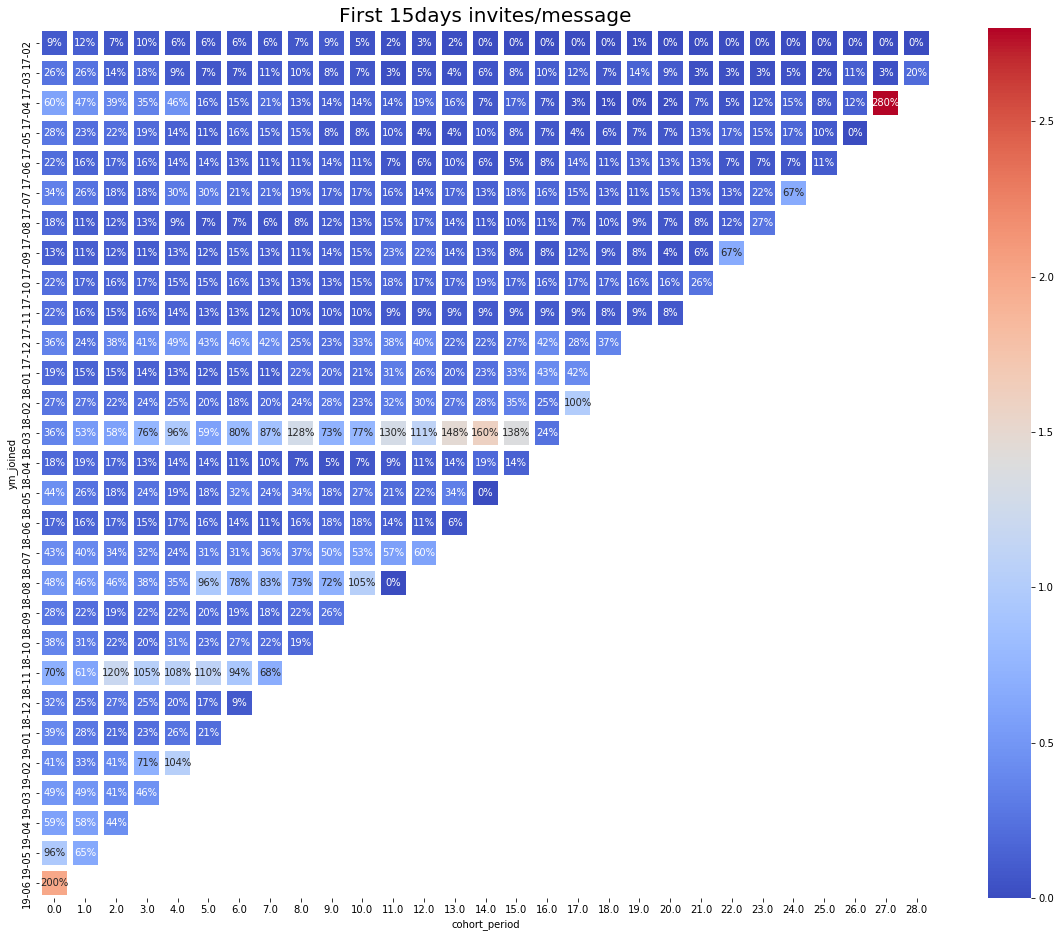

In [176]:
heatmap(df_f15d, title = 'First 15days invites/message' , unit = '0.0%')

In [178]:
def divide_2(invites):
    if invites['f2m_messages_sent'] != 0:
        return invites['f2m_invites']/invites['f2m_messages_sent']
    else:
        return 0
invites['invi_div_messa_f2m'] = invites.apply(lambda row: divide_2(row), axis = 1)
invites.head()

,brand_id,accountname,most_recent_login,joined_dojomojo,list_size,f2m_applications,f2m_invites,f15d_invites,f2m_accepted_applications,f2m_accepted_invites,f2m_messages_sent,f15d_messages_sent,invi_div_messa_15d,invi_div_messa_f2m
0,2,Luxury Link,2019-06-20 15:36:21,2015-10-29 02:51:32,650000,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,3,wine awesomeness,2019-06-20 16:20:57,2015-10-29 02:51:32,1100000,0.0,19.0,16.0,0.0,19.0,0.0,0.0,0.0,0.0
2,4,Travel + Leisure,2019-06-20 16:21:58,2015-10-29 02:51:32,1000000,0.0,2.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0
3,6,test brand,2017-05-18 19:24:39,2015-10-29 02:51:32,0,0.0,1.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN
4,9,Man Repeller,2017-10-31 19:30:34,2015-10-29 02:51:32,65000,0.0,1.0,1.0,0.0,1.0,NaN,NaN,NaN,NaN


In [179]:
invites.fillna(0)

,brand_id,accountname,most_recent_login,joined_dojomojo,list_size,f2m_applications,f2m_invites,f15d_invites,f2m_accepted_applications,f2m_accepted_invites,f2m_messages_sent,f15d_messages_sent,invi_div_messa_15d,invi_div_messa_f2m
0,2,Luxury Link,2019-06-20 15:36:21,2015-10-29 02:51:32,650000,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.000000,0.000000
1,3,wine awesomeness,2019-06-20 16:20:57,2015-10-29 02:51:32,1100000,0.0,19.0,16.0,0.0,19.0,0.0,0.0,0.000000,0.000000
2,4,Travel + Leisure,2019-06-20 16:21:58,2015-10-29 02:51:32,1000000,0.0,2.0,2.0,0.0,1.0,0.0,0.0,0.000000,0.000000
3,6,test brand,2017-05-18 19:24:39,2015-10-29 02:51:32,0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.000000
4,9,Man Repeller,2017-10-31 19:30:34,2015-10-29 02:51:32,65000,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.000000,0.000000
5,11,Freshly,2018-07-17 15:52:57,2015-10-29 02:51:32,800000,0.0,4.0,4.0,0.0,3.0,0.0,0.0,0.000000,0.000000
6,12,OAK73,2017-02-16 20:06:22,2015-10-29 02:51:32,100000,0.0,3.0,2.0,0.0,3.0,0.0,0.0,0.000000,0.000000
7,13,Stella Spoils,2018-08-13 15:24:26,2015-10-29 02:51:32,200000,0.0,4.0,4.0,0.0,4.0,0.0,0.0,0.000000,0.000000
8,14,goop,2019-05-23 18:55:49,2015-10-29 02:51:32,1000000,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.000000,0.000000
9,15,Uncubed,2019-06-16 18:46:27,2015-10-29 02:51:32,230000,0.0,3.0,2.0,0.0,3.0,0.0,0.0,0.000000,0.000000


In [181]:
cohorts_f2md = pd.merge(df, invites[['brand_id', 'invi_div_messa_f2m']], on = 'brand_id')
df3_f2md = cohorts_f2md.groupby(['ym_joined', 'cohort_period']).invi_div_messa_f2m.mean().unstack()

In [182]:
df3_f2md.head()

cohort_period,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0
ym_joined,,,,,,,,,,,,,,,,,,,,,
17-02,0.450267,0.247392,0.470574,0.377112,0.292023,0.694901,0.497100,0.144583,0.411484,0.460693,...,0.456698,0.629101,0.365217,0.388889,0.495213,0.792712,1.373457,1.388278,1.196203,1.050000
17-03,0.569015,0.442048,0.504349,0.812551,0.512605,0.434918,0.154439,0.395423,0.691500,0.524284,...,0.573633,0.223332,0.229836,0.738929,0.564574,0.203467,0.517597,0.262098,0.214766,0.489981
17-04,0.890495,0.571676,0.520638,0.540921,0.753348,0.403117,0.269274,0.276216,0.263025,0.268579,...,0.248673,0.252955,0.327124,0.253415,0.293680,0.239486,0.316411,0.265760,0.316667,NaN
17-05,0.737241,0.643428,0.636060,0.545206,0.406223,0.351265,0.450747,0.418730,0.446418,0.275004,...,0.207112,0.187356,0.266653,0.233410,0.210528,0.315215,0.298461,0.358413,NaN,NaN
17-06,0.444846,0.562617,0.462604,0.739936,0.591967,0.451291,0.324540,0.379117,0.310544,0.323050,...,0.394885,0.412410,0.421598,0.355053,0.259980,0.210642,0.074249,NaN,NaN,NaN


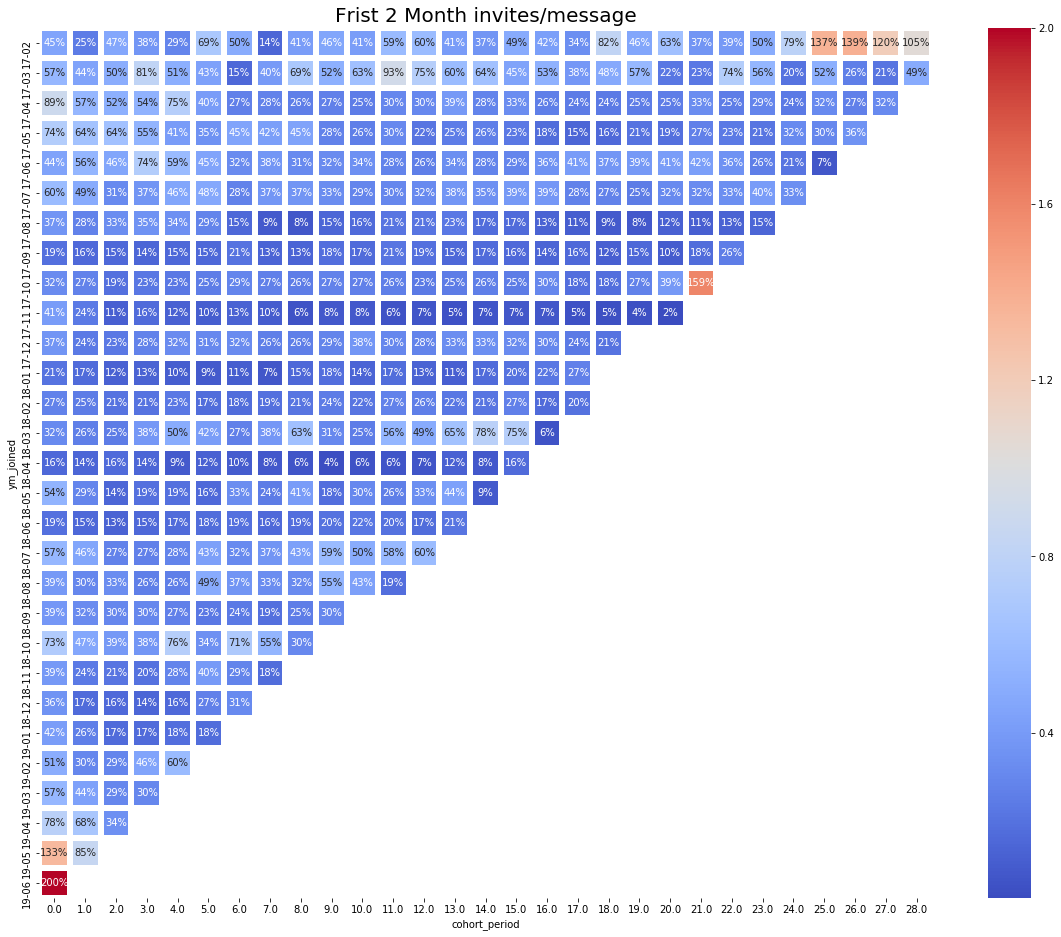

In [183]:
heatmap(df3_f2md, unit = '0.0%', title = 'Frist 2 Month invites/message')

invitees vs change overtime